In [2]:
import itertools
import numpy as np
import pandas as pd


N_dimension = 2
N_class = 3
N_points = 100

R = 20
phi = 2 * np.pi / N_class

mu_list = [[R * np.cos(phi * index) for index in range(N_class)], [R * np.sin(phi * index) for index in range(N_class)]]
sigma_list = [[index + 1 for index in range(N_class)], [2 * (index + 1) for index in range(N_class)]]

xy = np.array([[np.random.randn(N_points) * sigma + mu for sigma, mu in zip(sigma_list[index], mu_list[index])] for index in range(N_dimension)])
X = xy.reshape([2, 300]).T

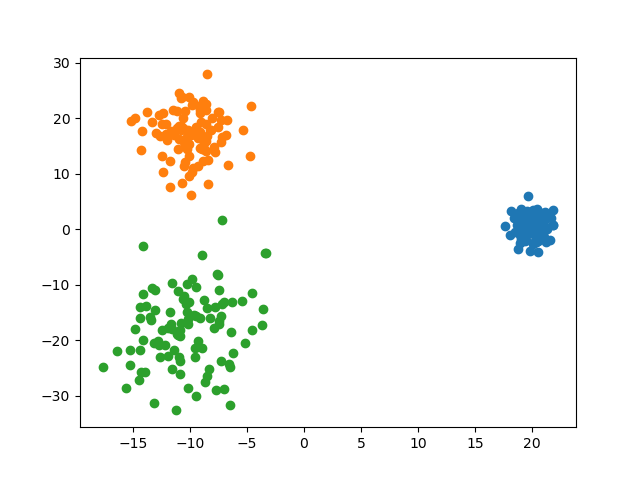

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure()
for index in range(N_class):
    plt.scatter(xy[0, index, :], xy[1, index, :])

%matplotlib widget
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


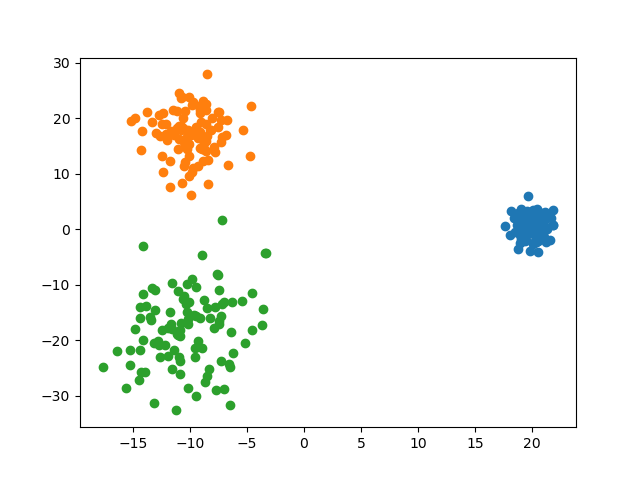

In [4]:
import numpy as np


class KMeans:

    def __init__(self, k):
        self.k = k
        self.k_indices = None

    def fit(self, X, epochs_max=1000):
        k_means = X[np.random.randint(low=0, high=X.shape[0]-1, size=self.k), :]
        distances = np.full([X.shape[0]], fill_value=np.Inf)
        k_indices = np.zeros([X.shape[0]], dtype=np.int_)
        k_indices_old = np.ones([X.shape[0]], dtype=np.int_)
        epochs_index = 0
        # while np.any(k_indices != k_indices_old) and epochs_index < epochs_max:
        # while epochs_index < epochs_max:
        while np.any(k_indices != k_indices_old):
            k_indices_old = np.copy(k_indices)
            for X_index in range(X.shape[0]):
                for k_means_index in range(k_means.shape[0]):
                    distance = np.sum((X[X_index, :] - k_means[k_means_index, :])**2)
                    if distance < distances[X_index]:
                        distances[X_index] = distance
                        k_indices[X_index] = k_means_index
            for k_means_index in range(k_means.shape[0]):
                k_means[k_means_index] = np.mean(X[k_indices == k_means_index, :], axis=0)
            epochs_index = epochs_index + 1
            # print(epochs_index)
        self.k_indices = k_indices

k = 3
k_means = KMeans(k=k)
k_means.fit(X)

print(k_means.k_indices)

import seaborn as sns
from matplotlib import pyplot as plt


plt.figure()
for index in range(k):
    plt.scatter(X[k_means.k_indices==index, 0], X[k_means.k_indices==index, 1])

%matplotlib widget
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


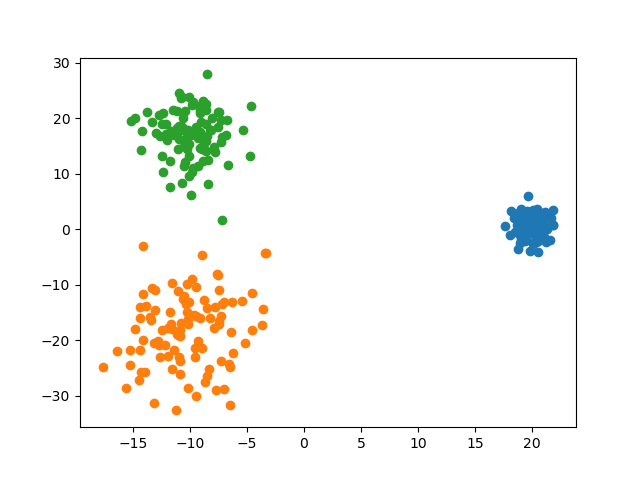

In [9]:
from sklearn.cluster import KMeans


k_means = KMeans(n_clusters=3)
k_indices = k_means.fit_predict(X)

print(k_indices)

import seaborn as sns
from matplotlib import pyplot as plt


plt.figure()
for index in range(k):
    plt.scatter(X[k_indices==index, 0], X[k_indices==index, 1])

%matplotlib widget
plt.show()